<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-их-ресемплирование-по-одному-часу." data-toc-modified-id="Загрузка-данных-и-их-ресемплирование-по-одному-часу.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных и их ресемплирование по одному часу.</a></span></li><li><span><a href="#Анализ-данных." data-toc-modified-id="Анализ-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных.</a></span></li><li><span><a href="#Подготовка-данных-для-обучения-моделей." data-toc-modified-id="Подготовка-данных-для-обучения-моделей.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных для обучения моделей.</a></span><ul class="toc-item"><li><span><a href="#Приведение-временого-ряда-к-стационарности." data-toc-modified-id="Приведение-временого-ряда-к-стационарности.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Приведение временого ряда к стационарности.</a></span></li><li><span><a href="#Инжиниринг-признаков." data-toc-modified-id="Инжиниринг-признаков.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Инжиниринг признаков.</a></span></li><li><span><a href="#Отбор-обучающих-признаков." data-toc-modified-id="Отбор-обучающих-признаков.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Отбор обучающих признаков.</a></span></li><li><span><a href="#Разбиение-на-обучающую,-валидационную-и-тестовую-выборки." data-toc-modified-id="Разбиение-на-обучающую,-валидационную-и-тестовую-выборки.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Разбиение на обучающую, валидационную и тестовую выборки.</a></span></li></ul></li><li><span><a href="#Разработка-моделей-машинного-обучения." data-toc-modified-id="Разработка-моделей-машинного-обучения.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Разработка моделей машинного обучения.</a></span><ul class="toc-item"><li><span><a href="#Prophet." data-toc-modified-id="Prophet.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Prophet.</a></span></li><li><span><a href="#LinearRegression." data-toc-modified-id="LinearRegression.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LinearRegression.</a></span></li><li><span><a href="#CatBoostRegressor." data-toc-modified-id="CatBoostRegressor.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoostRegressor.</a></span></li><li><span><a href="#LightGBM." data-toc-modified-id="LightGBM.-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LightGBM.</a></span></li><li><span><a href="#NeuralProphet" data-toc-modified-id="NeuralProphet-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>NeuralProphet</a></span></li></ul></li><li><span><a href="#Сравнение-качества-работы-моделей-на-валидационной-выборке." data-toc-modified-id="Сравнение-качества-работы-моделей-на-валидационной-выборке.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Сравнение качества работы моделей на валидационной выборке.</a></span></li><li><span><a href="#Тестирование-лучшей-модели." data-toc-modified-id="Тестирование-лучшей-модели.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование лучшей модели.</a></span></li><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод.</a></span></li></ul></div>

# Прогнозирование заказов такси в аэропортах.

В рамках данного проекта предпринимается попытка почасового прогнозирования количества заказов такси в аэропортах на основе анализа исторических данных о заказах. 

Целью проекта является построение модели, способной прогнозировать количество заказов такси на следующий час. Значение метрики RMSE на тестовой выборке должно быть не больше 48.

В проекте будет осуществляться решение задачи регрессии с применением методов обучения с учителем.

**Описание данных:**

Данные, предоставленные для анализа представляют собой временной ряд с информацией о количестве заказанных такси за каждые 10 минут.

**Краткий план работы:**
* Загрузка данных и их ресемплирование по одному часу.
* Анализ даных
* Подготовка данных для обучения моделей.
* Разработка моделей машинного обучения:
    * Prophet
    * LinearRegression
    * CatBoostRegression
    * LightGBM
    * NeuralProphet
* Сравнение качества работы моделей.
* Тестирование лучшей модели.

Применение модели, построенной в данном проекте, позволит компании "Чётенькое такси" привлекать больше водителей в период пиковой нагрузки и эффективно управлять ресурсами.

## Загрузка данных и их ресемплирование по одному часу.

In [1]:
# !pip install optuna
# !pip install category_encoders
# !pip install prophet
# !pip install neuralprophet --user

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json
import requests

import optuna

from catboost import CatBoostRegressor, Pool
from category_encoders.cat_boost import CatBoostEncoder
import lightgbm as lgb
from neuralprophet import(
    NeuralProphet, 
    set_random_seed
)
from prophet import Prophet

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.graphics import tsaplots
from statsmodels.tools.eval_measures import rmse

import warnings

C:\Users\daimy\.conda\envs\practicum\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [3]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
warnings.filterwarnings('ignore')

In [5]:
SEED = 6885
TEST_SIZE = 0.1

In [6]:
set_random_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

Откроем файл и выведем на экран первые 5 строк таблицы

In [7]:
df = pd.read_csv('data/taxi.csv', index_col=[0], parse_dates=[0])
df.head(10)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
2018-03-01 00:50:00,21
2018-03-01 01:00:00,7
2018-03-01 01:10:00,5
2018-03-01 01:20:00,17


Выполним сортировку данных по хронологическому возрастанию индексов.

In [8]:
df = df.sort_index()
df.index.is_monotonic_increasing

True

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Данные содержат информацию с марта по август 2018 года. Пропусков не обнаружено.

Выполним ресемплирование по одному часу.

In [10]:
df = df.resample('h').sum()
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


In [11]:
df.shape[0]

4416

**Выводы:**
* Данные предоставленные для анализа представляют собой временой ряд с интервалом в 10 минут, содержащий информацию о количестве заказанных такси.
* Таблица состоит из 26496 строк и 2 столбцов.
* Пропусков не обнаружено.
* Было произведено ресемплирование данных по одному часу, что привело к сокращению числа наблюдений до 4416.

## Анализ данных.

Построим график временного ряда.

In [12]:
def time_plot(series, title):
    plt.figure(figsize=(20,8))
    series.plot()
    plt.ylabel('Количество заказанных такси')
    plt.xlabel('Дата')
    plt.title(title)
    plt.show()

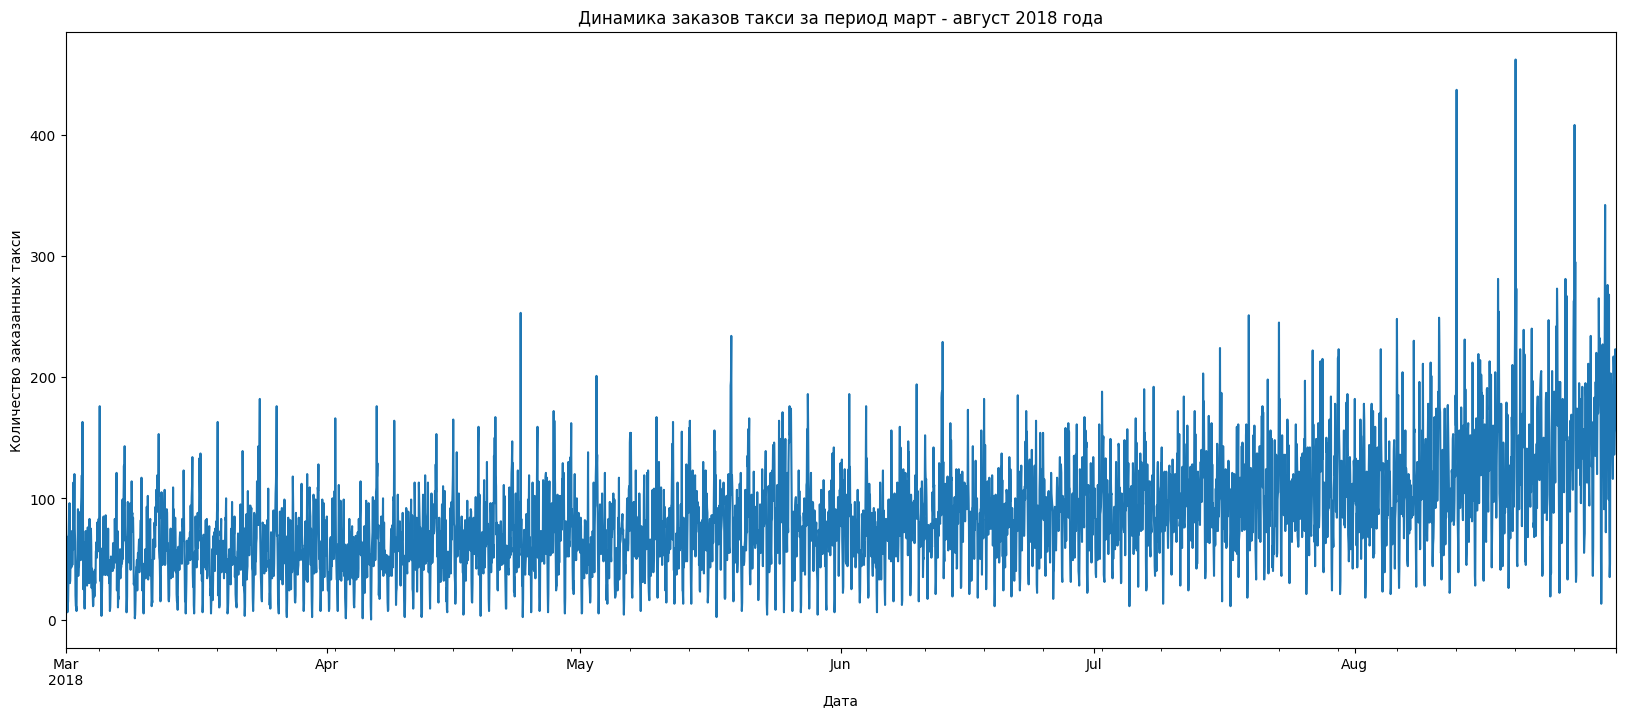

In [13]:
time_plot(df['num_orders'], 'Динамика заказов такси за период март - август 2018 года')

Добавим столбцы с понедельными скользящими средним и стандартным отклонением, исключив текущее значение ряда для расчёта.

In [14]:
df['mean'] = df['num_orders'].rolling(168, closed='left').mean()
df['std'] = df['num_orders'].rolling(168, closed='left').std()

In [15]:
df[166:170]

,num_orders,mean,std
datetime,,,
2018-03-07 22:00:00,127,NaN,NaN
2018-03-07 23:00:00,94,NaN,NaN
2018-03-08 00:00:00,143,54.23,29.60
2018-03-08 01:00:00,78,54.34,29.90


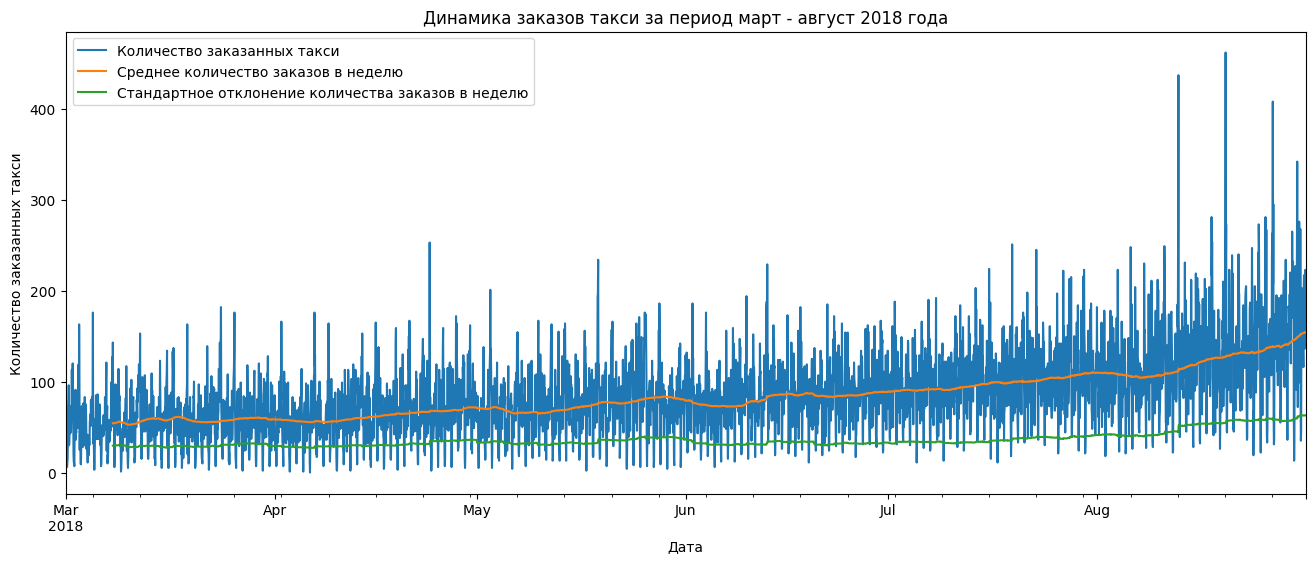

In [16]:
df.plot(figsize=(16, 6)) 
plt.ylabel('Количество заказанных такси')
plt.xlabel('Дата')
plt.legend(labels=['Количество заказанных такси',
                   'Среднее количество заказов в неделю',
                   'Стандартное отклонение количества заказов в неделю'])
plt.title('Динамика заказов такси за период март - август 2018 года')
plt.show()

Согласно визуальному анализу, временной ряд нестационарный: в нем наблюдается тренд на повышение с сезонной компонентой. 

In [17]:
for col in ['mean', 'std']:
    del df[col]

df.columns

Index(['num_orders'], dtype='object')

Разложим временной ряд на компоненты.

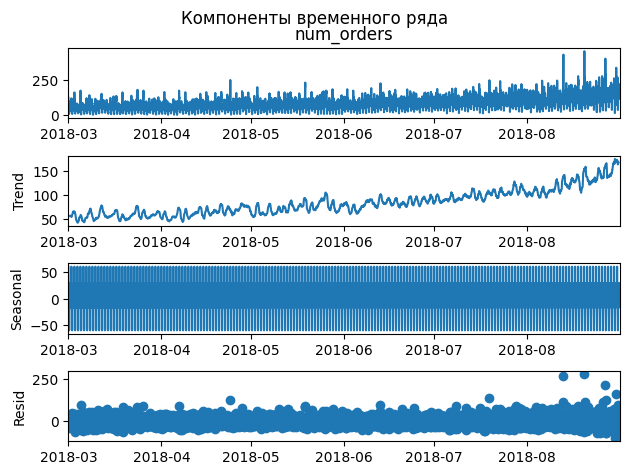

In [18]:
decompose = sm.tsa.seasonal_decompose(df['num_orders'])
decompose.plot()
plt.suptitle("Компоненты временного ряда")
plt.subplots_adjust(top=0.9) 
plt.show()

"Приблизим" график сезонной компоненты.

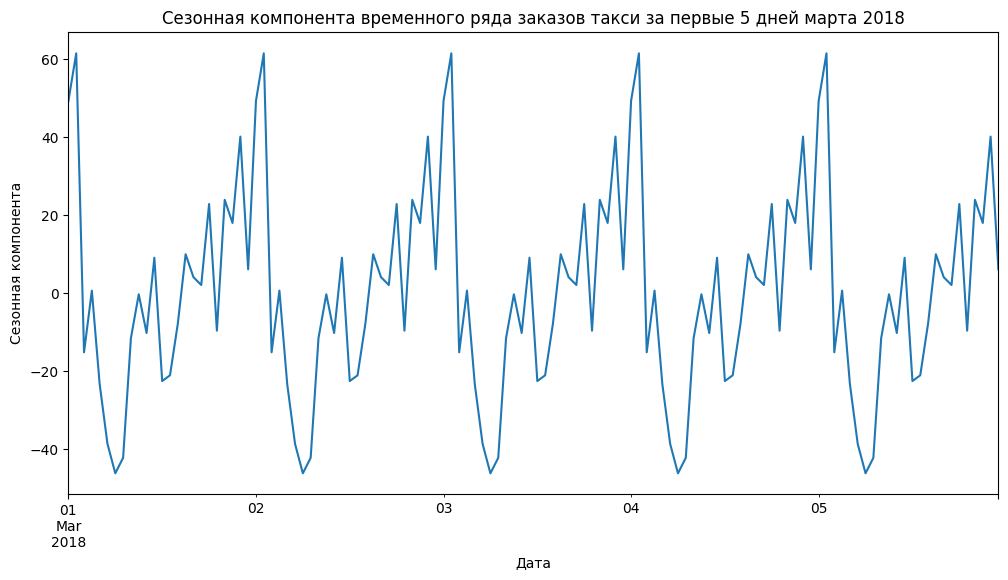

In [19]:
season = sm.tsa.seasonal_decompose(df['num_orders'][:'2018-03-05'])

season.seasonal.plot(figsize=(12, 6))
plt.ylabel('Сезонная компонента')
plt.xlabel('Дата')
plt.title('Сезонная компонента временного ряда заказов такси за первые 5 дней марта 2018')

plt.show()

Максимальные значения переменной наблюдаются около полуночи, а минимальные - в районе 6 часов утра.

Построим графики динамики заказов за март, май и за август с выделением предпраздничных, выходных и праздничных дней.

In [20]:
# URL для загрузки файла производственного календаря на 2018 год
url = 'https://raw.githubusercontent.com/d10xa/holidays-calendar/master/json/consultant2018.json'

# Загрузка данных о производственном календаре
response = requests.get(url)
production_calendar_data = response.json()

# Преобразование списка праздников в набор данных pandas
holidays_df = pd.DataFrame(production_calendar_data['holidays'], columns=['Date'])
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'])

# Преобразование списка предпраздничных дней в набор данных pandas
preholidays_df = pd.DataFrame(production_calendar_data['preholidays'], columns=['Date'])
preholidays_df['Date'] = pd.to_datetime(preholidays_df['Date'])


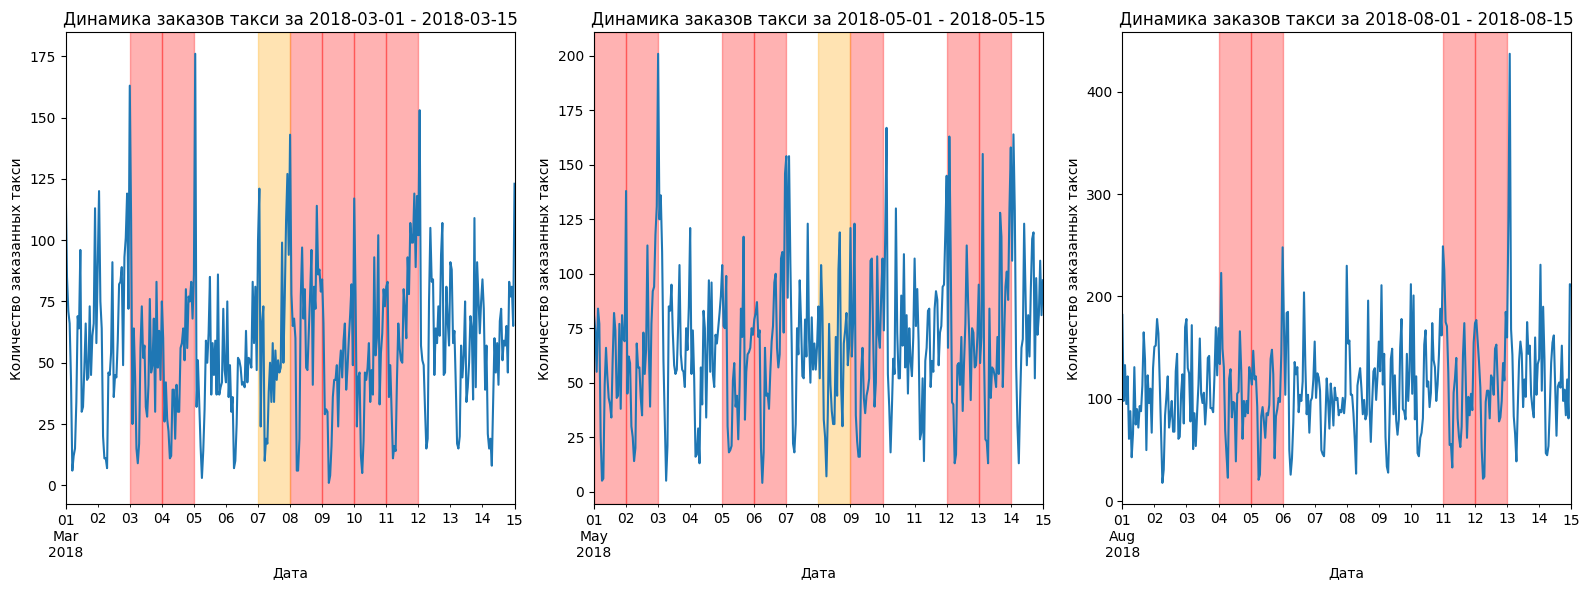

In [21]:
# Создание сетки графиков с одной строкой и тремя столбцами
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Цвета для праздничных и предпраздничных дней
holiday_color = 'red'
preholiday_color = 'orange'

# Создание диапазонов дат
months = [pd.date_range(start='2018-03-01', end='2018-03-15', freq='h'),
          pd.date_range(start='2018-05-01', end='2018-05-15', freq='h'),
          pd.date_range(start='2018-08-01', end='2018-08-15', freq='h')]

for i, month_dates in enumerate(months):
    month_data = df.loc[month_dates, 'num_orders']

    # Создание графика
    month_data.plot(ax=axes[i])
    axes[i].set_title(
        f'Динамика заказов такси за {month_dates[0].strftime("%Y-%m-%d")} - {month_dates[-1].strftime("%Y-%m-%d")}'
    )
    axes[i].set_ylabel('Количество заказанных такси')
    axes[i].set_xlabel('Дата')

    # Добавление прямоугольных спанов для праздников, выходных и предпраздничных дней
    for date in holidays_df['Date']:
        if date in month_dates:
            axes[i].axvspan(date, date + pd.Timedelta(days=1), color=holiday_color, alpha=0.3)

    for date in preholidays_df['Date']:    
        if date in month_dates:
            axes[i].axvspan(date, date + pd.Timedelta(days=1), color=preholiday_color, alpha=0.3)

# Вывод графиков
plt.tight_layout()
plt.show()

На графике наблюдаются пики около полуночи особенно выраженные перед началом выходных и после их окончания. Так же стоит обратить внимание на тот факт, что максимальное значение количества заказов в первой половине августа более чем в 2 раза больше, чем максимальное значение в первой половине марта.

Постороим график автокорреляции временного ряда с лагом равным 4 неделям.

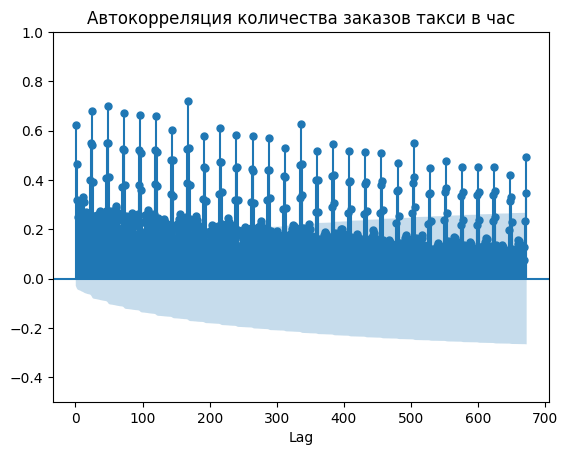

In [22]:
tsaplots.plot_acf(df['num_orders'], lags=672, zero=False, title='Автокорреляция количества заказов такси в час')
plt.xlabel('Lag')
plt.ylim(-0.5)
plt.show() 

Постороим график частичной автокорреляции временного ряда с лагом равным 4 неделям.

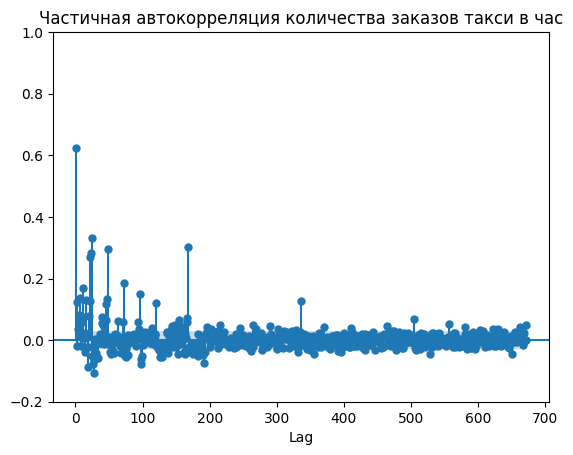

In [23]:
tsaplots.plot_pacf(df['num_orders'], lags=672, zero=False, title='Частичная автокорреляция количества заказов такси в час')
plt.xlabel('Lag')
plt.ylim(-0.2)
plt.show() 

Постороим график частичной автокорреляции временного ряда с лагом равным 5 дней.

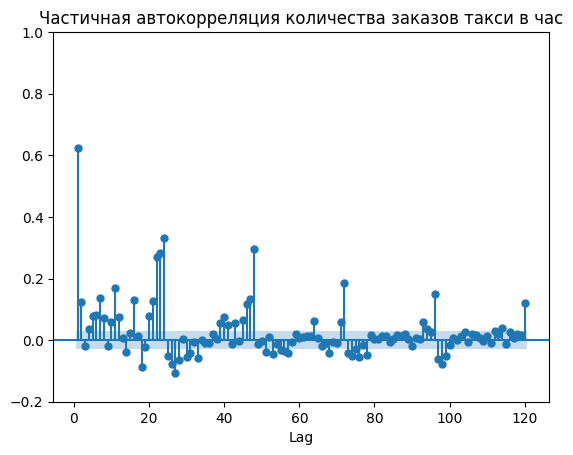

In [24]:
tsaplots.plot_pacf(df['num_orders'], lags=120, zero=False, title='Частичная автокорреляция количества заказов такси в час')
plt.xlabel('Lag')
plt.ylim(-0.2)
plt.show() 

Графики ACF и PACF подтверждают наличие тренда и 2 сезонных компонент: посуточной и понедельной.

Проведем помесячный анализ данных о количистве заказанных такси.

In [25]:
# Ресемплинг по месяцам
monthly_orders = df.resample('M').sum()

# Изменение заказов такси месяц к месяцу
monthly_orders['monthly_changes'] = monthly_orders['num_orders'].diff()
monthly_orders['monthly_fractional_change'] = monthly_orders['num_orders'].pct_change()

monthly_orders

,num_orders,monthly_changes,monthly_fractional_change
datetime,,,
2018-03-31,42768,NaN,NaN
2018-04-30,45939,"3,171.00",0.07
2018-05-31,54820,"8,881.00",0.19
2018-06-30,59906,"5,086.00",0.09
2018-07-31,74405,"14,499.00",0.24
2018-08-31,94973,"20,568.00",0.28


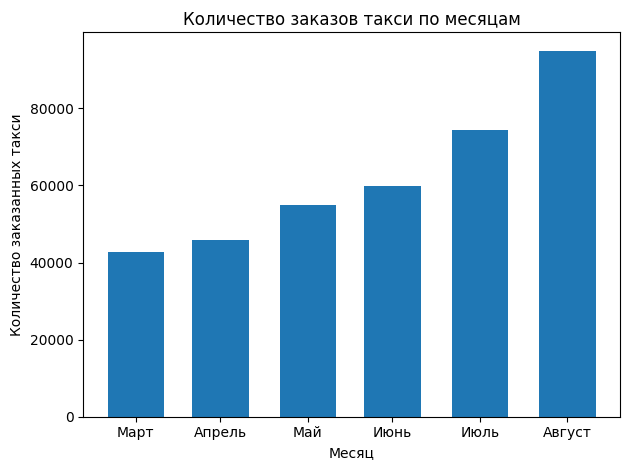

In [26]:
plt.bar(monthly_orders.index, monthly_orders['num_orders'], width=20)
plt.xticks(ticks=monthly_orders.index, labels=['Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август'])
plt.xlabel('Месяц')
plt.ylabel('Количество заказанных такси')
plt.title('Количество заказов такси по месяцам')
plt.tight_layout()
plt.show()

Количество заказов такси увеличивается каждый месяц, что указывает на тренд роста. Скорость роста тренда непостоянна: после снижения в июне она резко возрастает в июле и в августе.

Проведем  анализ шума временного ряда.

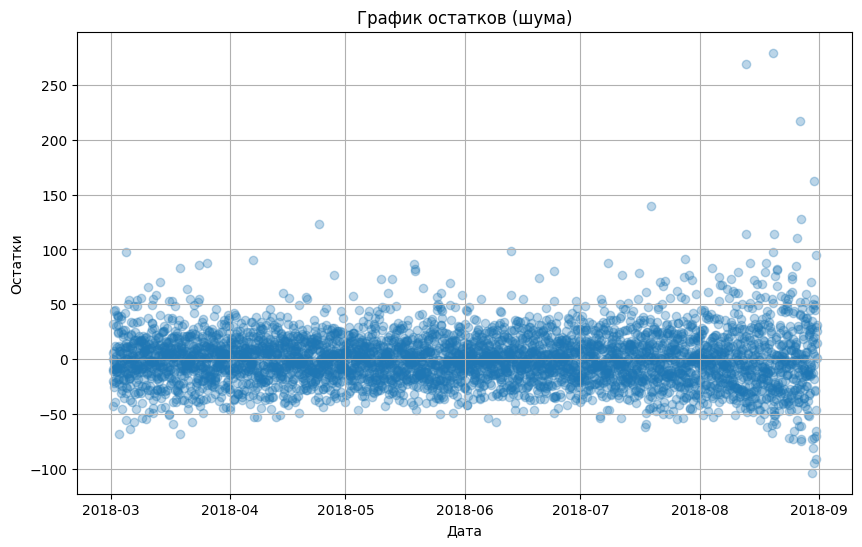

In [27]:
residuals = decompose.resid

plt.figure(figsize=(10, 6))
plt.scatter(residuals.index, residuals, alpha=0.3)
plt.title('График остатков (шума)')
plt.xlabel('Дата')
plt.ylabel('Остатки')
plt.grid(True)
plt.show()

Во второй половине августа наблюдается увеличение разброса точек, это может быть интерпретировано как увеличение неопределенности в данных в этот период времени. Можно предположить наличие годовой сезонности, но ввиду отсутствия данных за предшествующие год, проверить эту гипотезу не представляется возможным.

**Выводы:**
*	Исследуемый временной ряд не является стационарным.
*	Наблюдается восходящий тренд с посуточной и понедельной сезонными компонентами.
*   В июле рост тренда начинает заметно ускоряться.
*	Пиковые значения переменной приходятся на полночь, в то время как минимальные значения - на раннее утро, приблизительно 6 часов. 
*	В разрезе недели значительные пики проявляются с ночь с пятницы на субботу и с воскресенья на понедельник, а также перед и после праздников.
*   Визуальный анализ остатков позволяет сделать вывод об увеличении неопределенности в данных во второй половине августа. Это, в свою очередь, может привести к появлению относительно большой разницы между метриками при обучении и исследовании модели, и ее проверкой на тестовой выборке.

## Подготовка данных для обучения моделей.

### Приведение временого ряда к стационарности.

Проведем дифференцирование ряда по меньшей из величин сезонности.

In [28]:
df['data_dif'] = df['num_orders'] - df['num_orders'].shift(24)

In [29]:
df.tail()

,num_orders,data_dif
datetime,,
2018-08-31 19:00:00,136,64.00
2018-08-31 20:00:00,154,12.00
2018-08-31 21:00:00,159,-39.00
2018-08-31 22:00:00,223,65.00
2018-08-31 23:00:00,205,-41.00


Удалим образовавшиеся в ходе преобразования пропуски.

In [30]:
df = df.dropna().copy()
df.shape[0]

4392

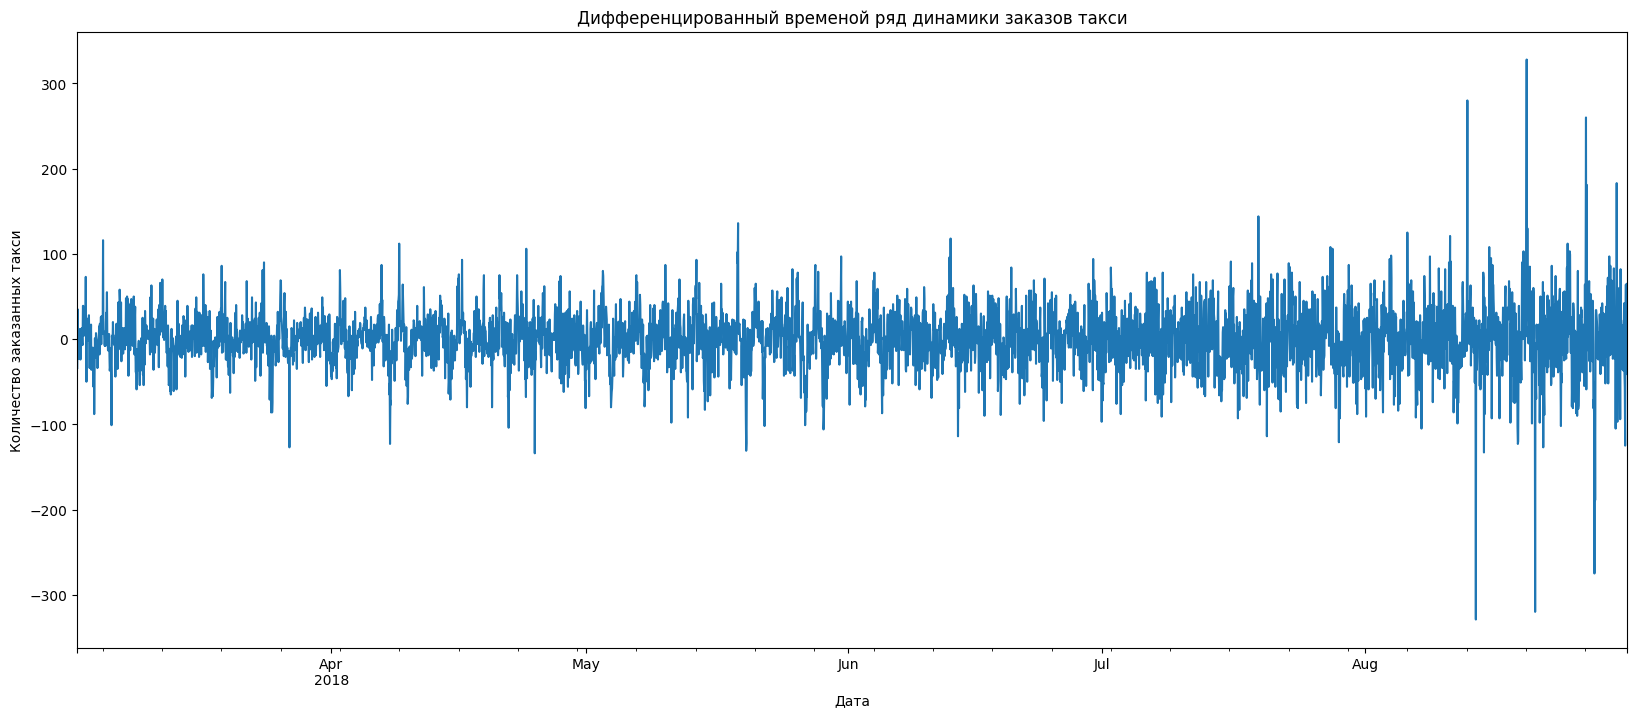

In [31]:
time_plot(df['data_dif'], 'Дифференцированный временой ряд динамики заказов такси')

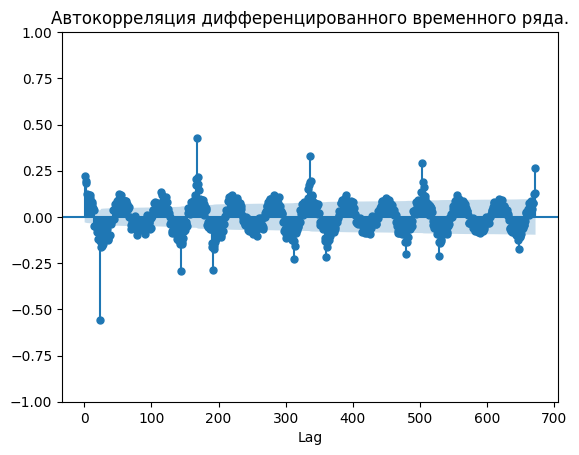

In [32]:
tsaplots.plot_acf(df['data_dif'], lags=672, zero=False, title='Автокорреляция дифференцированного временного ряда.')
plt.xlabel('Lag')

plt.show() 

Проведем второе сезонное дифференцирование с периодом равным неделе.

In [33]:
df['data_dif_2'] = df['data_dif'] - df['data_dif'].shift(168)
df.tail()

,num_orders,data_dif,data_dif_2
datetime,,,
2018-08-31 19:00:00,136,64.00,33.00
2018-08-31 20:00:00,154,12.00,-72.00
2018-08-31 21:00:00,159,-39.00,-23.00
2018-08-31 22:00:00,223,65.00,-47.00
2018-08-31 23:00:00,205,-41.00,-44.00


Удалим образовавшиеся в ходе преобразования пропуски.

In [34]:
df = df.dropna().copy()
df.shape[0]

4224

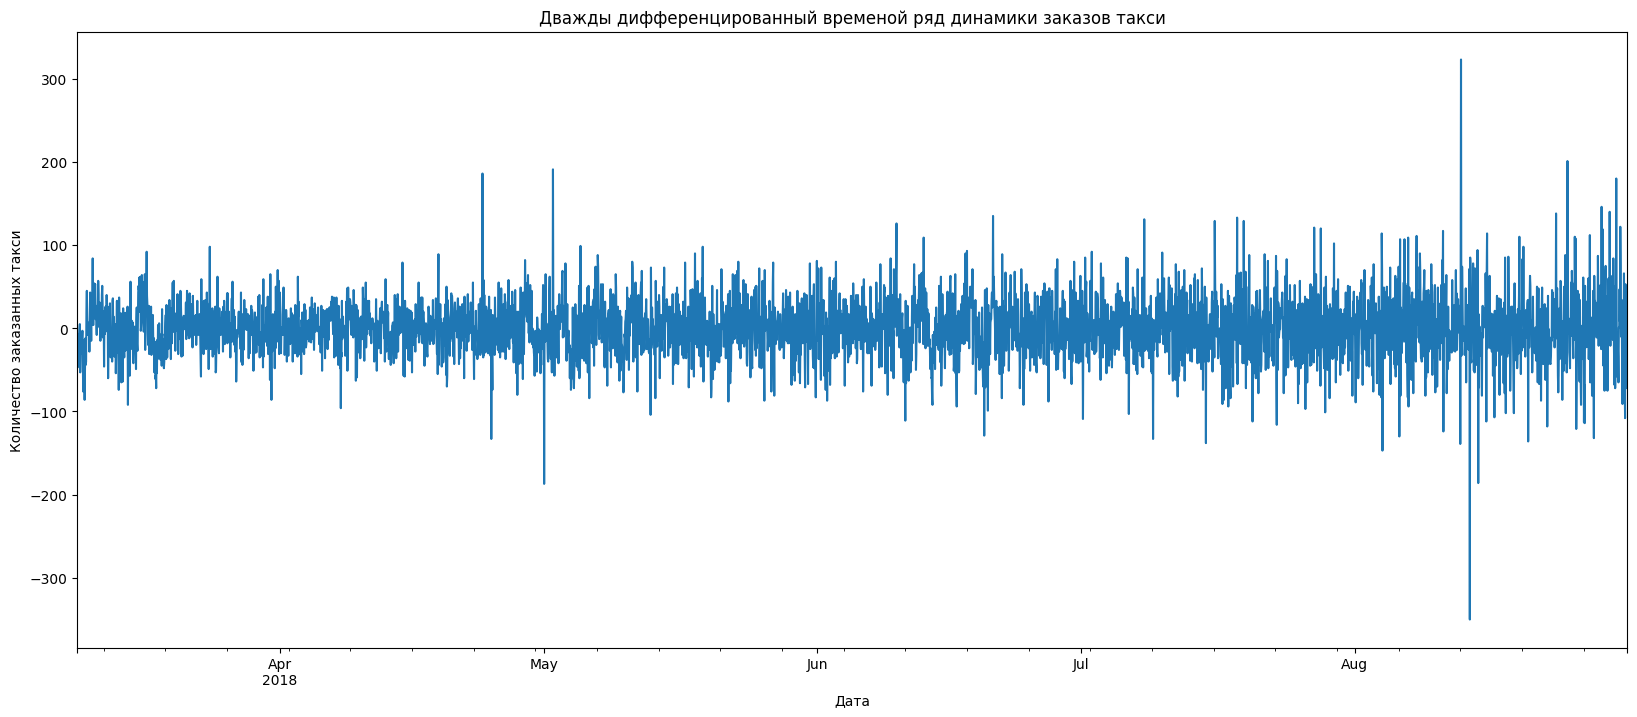

In [35]:
time_plot(df['data_dif_2'], 'Дважды дифференцированный временой ряд динамики заказов такси')

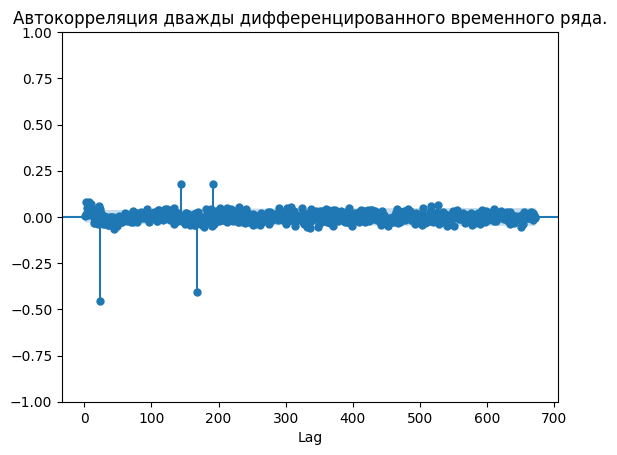

In [36]:
tsaplots.plot_acf(df['data_dif_2'], lags=672, zero=False, title='Автокорреляция дважды дифференцированного временного ряда.')
plt.xlabel('Lag')

plt.show() 

Проверим стационарность с помощью расширенного теста Дики-Фуллера:
* нулевая гипотеза - ряд нестационарный;
* альтернативная гипотеза - ряд стационарный;
* пороговое значение статистической значимости 0.05.

In [37]:
def adf(series, alpha=0.05):
    p_value = ts.adfuller(series)[1]
    print(f"p-value = {p_value}")
    if p_value > alpha:
        print('Ряд не стационарный')
    else:
        print('Ряд стационарный')

In [38]:
adf(df['data_dif_2'])

p-value = 1.2726048498816727e-23
Ряд стационарный


Временной ряд стал стационарным в результате двойного сезонного дифференцирования.

### Инжиниринг признаков.

Добавим информацию с подневным и понедельным скользящими средним и стандартным отклонением, часом и номером дня недели, а также количестве заказов в предыдущий час, 6, 12, 18, 24 и 168 часов назад.

In [39]:
df = df.reset_index()
df.sample()

,datetime,num_orders,data_dif,data_dif_2
3419,2018-07-29 11:00:00,60,-44.00,0.00


In [40]:
lags = [1, 6, 12, 18, 24, 168]
stat_labels = ['day', 'week']
window_sizes = [24, 168]

df['is_holiday'] = df['datetime'].isin(holidays_df['Date']).astype(int)

df['dayofweek'] = df['datetime'].dt.dayofweek
df['hour'] = df['datetime'].dt.hour

for size, label in zip(window_sizes, stat_labels):
    df[f'{label}_mean'] = df['data_dif'].rolling(size, closed='left').mean()
    df[f'{label}_std'] = df['data_dif'].rolling(size, closed='left').std()

for lag in lags:
    df[f'lag_{lag}'] = df['data_dif'].shift(lag)
    
df.tail(5)

,datetime,num_orders,data_dif,data_dif_2,is_holiday,dayofweek,hour,day_mean,day_std,week_mean,week_std,lag_1,lag_6,lag_12,lag_18,lag_24,lag_168
4219,2018-08-31 19:00:00,136,64.00,33.00,0,4,19,-12.04,49.96,4.88,58.99,30.00,12.00,7.00,-23.00,-97.00,31.00
4220,2018-08-31 20:00:00,154,12.00,-72.00,0,4,20,-5.33,48.85,5.07,59.14,64.00,42.00,16.00,-2.00,-49.00,84.00
4221,2018-08-31 21:00:00,159,-39.00,-23.00,0,4,21,-2.79,48.06,4.64,58.82,12.00,-40.00,-23.00,-94.00,28.00,-16.00
4222,2018-08-31 22:00:00,223,65.00,-47.00,0,4,22,-5.58,48.14,4.51,58.90,-39.00,-57.00,-36.00,82.00,-19.00,112.00
4223,2018-08-31 23:00:00,205,-41.00,-44.00,0,4,23,-2.08,50.13,4.23,58.49,65.00,-125.00,11.00,22.00,-19.00,3.00


Вычислим минимальное, максимальное и среднее значение количества заказов для данных сгруппированных по дням недели и часам.

In [41]:
df_grouped = df.groupby(by=['dayofweek', 'hour'])['data_dif'].agg(['min', 'max', 'mean'])
df_grouped.head()

min    max  mean
dayofweek hour                    
0         0    -42.00 125.00 47.60
          1     -6.00 179.00 49.92
          2    -43.00 328.00 63.72
          3    -74.00  87.00 17.40
          4    -49.00 181.00 23.84

In [42]:
df = df.merge(df_grouped, how='left', on=['dayofweek', 'hour'])
df.head()

,datetime,num_orders,data_dif,data_dif_2,is_holiday,dayofweek,hour,day_mean,day_std,week_mean,week_std,lag_1,lag_6,lag_12,lag_18,lag_24,lag_168,min,max,mean
0,2018-03-09 00:00:00,84,-59.00,-25.00,1,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-80.00,73.00,-0.15
1,2018-03-09 01:00:00,66,-12.00,-47.00,0,4,1,NaN,NaN,NaN,NaN,-59.00,NaN,NaN,NaN,NaN,NaN,-71.00,49.00,-5.62
2,2018-03-09 02:00:00,29,-36.00,-40.00,0,4,2,NaN,NaN,NaN,NaN,-12.00,NaN,NaN,NaN,NaN,NaN,-62.00,46.00,-9.58
3,2018-03-09 03:00:00,31,-37.00,-35.00,0,4,3,NaN,NaN,NaN,NaN,-36.00,NaN,NaN,NaN,NaN,NaN,-102.00,40.00,-33.88
4,2018-03-09 04:00:00,30,-30.00,-7.00,0,4,4,NaN,NaN,NaN,NaN,-37.00,NaN,NaN,NaN,NaN,NaN,-77.00,82.00,-7.88


Добавим столбцы с вычисленными ранее статистиками, но со сдвигом в 1 и 24.

In [43]:
lags = [1, 24]
cols = ['min', 'max', 'mean']
for lag in lags:
    for col in cols:
        df[f'lag_{col}_{lag}'] = df[col].shift(lag)
    
df.tail()

,datetime,num_orders,data_dif,data_dif_2,is_holiday,dayofweek,hour,day_mean,day_std,week_mean,week_std,lag_1,lag_6,lag_12,lag_18,lag_24,lag_168,min,max,mean,lag_min_1,lag_max_1,lag_mean_1,lag_min_24,lag_max_24,lag_mean_24
4219,2018-08-31 19:00:00,136,64.00,33.00,0,4,19,-12.04,49.96,4.88,58.99,30.00,12.00,7.00,-23.00,-97.00,31.00,-24.00,64.00,18.19,-42.00,68.00,15.38,-97.00,12.00,-29.60
4220,2018-08-31 20:00:00,154,12.00,-72.00,0,4,20,-5.33,48.85,5.07,59.14,64.00,42.00,16.00,-2.00,-49.00,84.00,-54.00,84.00,20.96,-24.00,64.00,18.19,-49.00,60.00,-12.36
4221,2018-08-31 21:00:00,159,-39.00,-23.00,0,4,21,-2.79,48.06,4.64,58.82,12.00,-40.00,-23.00,-94.00,28.00,-16.00,-60.00,81.00,12.96,-54.00,84.00,20.96,-93.00,45.00,-0.48
4222,2018-08-31 22:00:00,223,65.00,-47.00,0,4,22,-5.58,48.14,4.51,58.90,-39.00,-57.00,-36.00,82.00,-19.00,112.00,-16.00,112.00,55.12,-60.00,81.00,12.96,-53.00,21.00,-0.20
4223,2018-08-31 23:00:00,205,-41.00,-44.00,0,4,23,-2.08,50.13,4.23,58.49,65.00,-125.00,11.00,22.00,-19.00,3.00,-54.00,89.00,3.85,-16.00,112.00,55.12,-80.00,59.00,3.76


Удалим столбцы, которые могут привести к утечке данных.

In [44]:
for col in cols:
    del df[col]
    
df.tail()

,datetime,num_orders,data_dif,data_dif_2,is_holiday,dayofweek,hour,day_mean,day_std,week_mean,week_std,lag_1,lag_6,lag_12,lag_18,lag_24,lag_168,lag_min_1,lag_max_1,lag_mean_1,lag_min_24,lag_max_24,lag_mean_24
4219,2018-08-31 19:00:00,136,64.00,33.00,0,4,19,-12.04,49.96,4.88,58.99,30.00,12.00,7.00,-23.00,-97.00,31.00,-42.00,68.00,15.38,-97.00,12.00,-29.60
4220,2018-08-31 20:00:00,154,12.00,-72.00,0,4,20,-5.33,48.85,5.07,59.14,64.00,42.00,16.00,-2.00,-49.00,84.00,-24.00,64.00,18.19,-49.00,60.00,-12.36
4221,2018-08-31 21:00:00,159,-39.00,-23.00,0,4,21,-2.79,48.06,4.64,58.82,12.00,-40.00,-23.00,-94.00,28.00,-16.00,-54.00,84.00,20.96,-93.00,45.00,-0.48
4222,2018-08-31 22:00:00,223,65.00,-47.00,0,4,22,-5.58,48.14,4.51,58.90,-39.00,-57.00,-36.00,82.00,-19.00,112.00,-60.00,81.00,12.96,-53.00,21.00,-0.20
4223,2018-08-31 23:00:00,205,-41.00,-44.00,0,4,23,-2.08,50.13,4.23,58.49,65.00,-125.00,11.00,22.00,-19.00,3.00,-16.00,112.00,55.12,-80.00,59.00,3.76


Удалим образовавшиеся в ходе преобразований пропуски.

In [45]:
df = df.dropna().copy()
df.shape[0]

4056

Преобразуем тип данных в категориальных столбцах.

In [46]:
cat_cols = ['dayofweek', 'hour']
df[cat_cols] = df[cat_cols].astype('category')
df.dtypes

datetime       datetime64[ns]
num_orders              int64
data_dif              float64
data_dif_2            float64
is_holiday              int32
dayofweek            category
hour                 category
day_mean              float64
day_std               float64
week_mean             float64
week_std              float64
lag_1                 float64
lag_6                 float64
lag_12                float64
lag_18                float64
lag_24                float64
lag_168               float64
lag_min_1             float64
lag_max_1             float64
lag_mean_1            float64
lag_min_24            float64
lag_max_24            float64
lag_mean_24           float64
dtype: object

###  Отбор обучающих признаков.

Объявим переменные с именами признаков, классифицированными по категориям.

In [47]:
# целевой признак:
y = 'data_dif_2'

# признаки, которые будут использованы для обучения моделей:
x_all = (df.select_dtypes(exclude='datetime').columns
         .difference(['num_orders', 'data_dif', 'data_dif_2']))

# категориальные признаки:
x_cat = cat_cols

# числовые признаки:
x_num = x_all.difference(x_cat)

In [48]:
print(f'\033[1mцелевой признак:\033[0m {y}')
print(f'\033[1mобучающие признаки:\033[0m {x_all}')
print(f'\033[1mиз них:\033[0m')
print(f'\033[1mкатегориальные признаки:\033[0m {x_cat},')
print(f'\033[1mчисловые признаки:\033[0m {x_num}')

целевой признак: data_dif_2
обучающие признаки: Index(['day_mean', 'day_std', 'dayofweek', 'hour', 'is_holiday', 'lag_1',
       'lag_12', 'lag_168', 'lag_18', 'lag_24', 'lag_6', 'lag_max_1',
       'lag_max_24', 'lag_mean_1', 'lag_mean_24', 'lag_min_1', 'lag_min_24',
       'week_mean', 'week_std'],
      dtype='object')
из них:
категориальные признаки: ['dayofweek', 'hour'],
числовые признаки: Index(['day_mean', 'day_std', 'is_holiday', 'lag_1', 'lag_12', 'lag_168',
       'lag_18', 'lag_24', 'lag_6', 'lag_max_1', 'lag_max_24', 'lag_mean_1',
       'lag_mean_24', 'lag_min_1', 'lag_min_24', 'week_mean', 'week_std'],
      dtype='object')


### Разбиение на обучающую, валидационную и тестовую выборки.

Разделим исходные данные на обучающую, валидационную и тестовую выборки.

In [49]:
x_tr, x_test, y_tr, y_test =(
    train_test_split(df[x_all], df[y], test_size=TEST_SIZE, shuffle=False)
)
x_tr.shape[0], x_test.shape[0]

(3650, 406)

In [50]:
x_train, x_valid, y_train, y_valid =(
    train_test_split(x_tr, y_tr, test_size=TEST_SIZE, shuffle=False)
)
x_train.shape[0], x_valid.shape[0]

(3285, 365)

In [51]:
print('Размерность тренировочной выборки:', x_train.shape)
print('Размерность валидационной выборки выборки:', x_valid.shape)
print('Размерность тестовой выборки:', x_test.shape)

Размерность тренировочной выборки: (3285, 19)
Размерность валидационной выборки выборки: (365, 19)
Размерность тестовой выборки: (406, 19)


**Выводы**:
* Временной ряд был приведён к стационарному виду.
* В датафрейм были добавлены синтетические признаки.
* После отбора и классификации обучающих признаков, данные были разделены на обучающую, валидационную и тестовую выборки.


## Разработка моделей машинного обучения.

Согласно заданию, метрикой качества является RMSE. Пороговое значение - 48.

### Prophet.

Для корректной работы модели Prophet данные должны содержать только метку времени и значение. Столбцы следует переименовать.

In [52]:
data_prophet = df[['datetime', 'num_orders']].copy()

In [53]:
data_prophet.columns = ['ds','y']
data_prophet.head()

,ds,y
168,2018-03-16 00:00:00,110
169,2018-03-16 01:00:00,134
170,2018-03-16 02:00:00,39
171,2018-03-16 03:00:00,27
172,2018-03-16 04:00:00,47


Разделим полученный датасет на тренировочный и валидационный в соответствии с уже выполненным разбиением.

In [54]:
train_indices = x_train.index.tolist()
valid_indices = x_valid.index.tolist()

In [55]:
train_prophet = data_prophet.loc[train_indices]
valid_prophet = data_prophet.loc[valid_indices]

In [56]:
print('Размерность тренировочной выборки:', train_prophet.shape)
print('Размерность валидационной выборки выборки:', valid_prophet.shape)

Размерность тренировочной выборки: (3285, 2)
Размерность валидационной выборки выборки: (365, 2)


Создадим датафрейм с датами нерабочих дней из производственного календаря, соответствующий требованиям модели.

In [57]:
holidays = pd.DataFrame({'holiday': 'holiday', 'ds': holidays_df['Date']})
holidays.head()

,holiday,ds
0,holiday,2018-01-01
1,holiday,2018-01-02
2,holiday,2018-01-03
3,holiday,2018-01-04
4,holiday,2018-01-05


In [58]:
prophet = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    holidays=holidays
)
prophet.fit(train_prophet)

03:55:36 - cmdstanpy - INFO - Chain [1] start processing
03:55:36 - cmdstanpy - INFO - Chain [1] done processing


In [59]:
periods = valid_prophet.shape[0]
future = prophet.make_future_dataframe(periods=periods, freq='h')
forecast = prophet.predict(future)

In [60]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,holiday,holiday_lower,holiday_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3645,2018-08-14 21:00:00,120.30,91.54,151.60,119.98,120.62,1.86,1.86,1.86,10.66,10.66,10.66,0.00,0.00,0.00,0.00,0.00,0.00,-8.80,-8.80,-8.80,0.00,0.00,0.00,122.16
3646,2018-08-14 22:00:00,120.33,104.32,164.91,120.00,120.64,15.83,15.83,15.83,23.77,23.77,23.77,0.00,0.00,0.00,0.00,0.00,0.00,-7.94,-7.94,-7.94,0.00,0.00,0.00,136.16
3647,2018-08-14 23:00:00,120.35,112.90,172.01,120.03,120.67,22.51,22.51,22.51,29.56,29.56,29.56,0.00,0.00,0.00,0.00,0.00,0.00,-7.05,-7.05,-7.05,0.00,0.00,0.00,142.86
3648,2018-08-15 00:00:00,120.38,113.86,172.70,120.05,120.70,24.62,24.62,24.62,30.76,30.76,30.76,0.00,0.00,0.00,0.00,0.00,0.00,-6.14,-6.14,-6.14,0.00,0.00,0.00,145.00
3649,2018-08-15 01:00:00,120.41,116.48,177.12,120.08,120.73,25.84,25.84,25.84,31.05,31.05,31.05,0.00,0.00,0.00,0.00,0.00,0.00,-5.21,-5.21,-5.21,0.00,0.00,0.00,146.25


In [61]:
prophet_pred = pd.DataFrame({"date":forecast['ds'], 
                             "pred": np.ceil(forecast["yhat"])})

prophet_pred = prophet_pred.set_index("date")
prophet_pred[-len(valid_indices):].tail()

,pred
date,
2018-08-14 21:00:00,123.00
2018-08-14 22:00:00,137.00
2018-08-14 23:00:00,143.00
2018-08-15 00:00:00,146.00
2018-08-15 01:00:00,147.00


Построим графики количества предсказанных и фактических заказов такси за валидационный период.

In [62]:
def plot_prediction_real(predictions, target):
    plt.figure(figsize=(16,5))
    predictions.plot()
    target.plot(fontsize=14)
    plt.xlabel("Дата")
    plt.ylabel("Количество заказов такси")
    plt.legend(labels=['Предсказанное количество заказанных такси',
                       'Фактическое количество заказанных такси'])
    plt.title("Сравнение предсказанного и фактического количества заказов такси")
    plt.show()

In [63]:
valid_target = valid_prophet.set_index(['ds'])

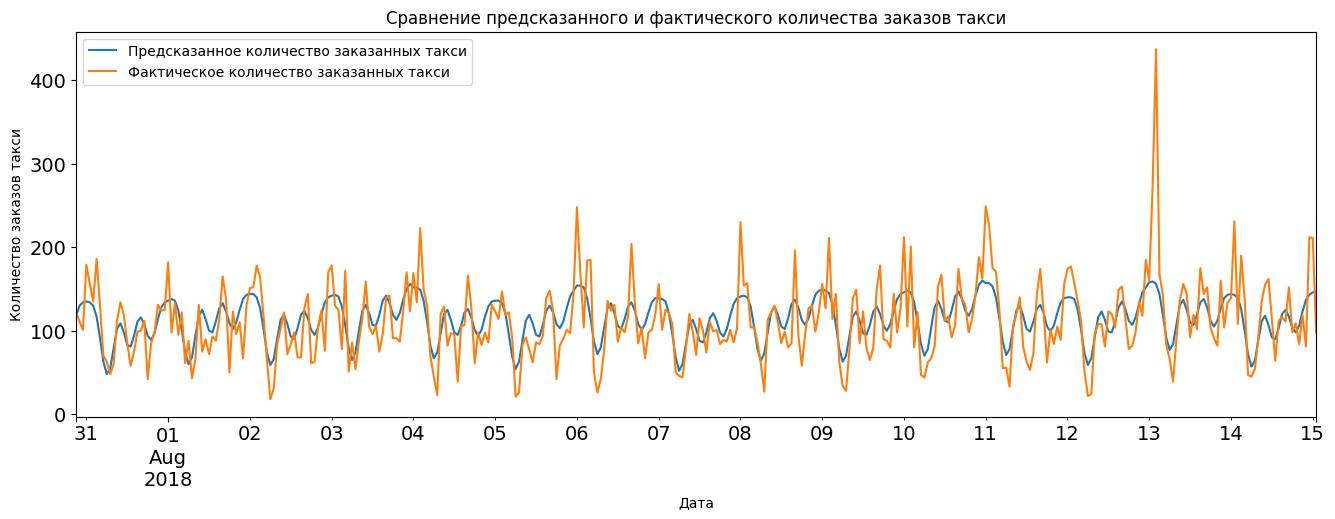

In [64]:
plot_prediction_real(prophet_pred[-len(valid_indices):]['pred'], valid_target['y'])

In [65]:
prophet_rmse = rmse(valid_prophet['y'], prophet_pred[-len(valid_indices):]['pred'])
print(f'RMSE: {prophet_rmse}')

RMSE: 34.03752964974888


### LinearRegression.

Для корректной работы модели Линейной регрессии числовые данные должны быть отмасштабированы, категориальные - закодированы.

In [66]:
# Обработка категориальных признаков
cbe_pipe = make_pipeline(
    CatBoostEncoder(random_state=SEED)
)

# Обработка числовых признаков
numeric_pipe = make_pipeline(StandardScaler())

# Трансформер для всех признаков
full = ColumnTransformer(
    transformers=[
        ('encoding', cbe_pipe, x_cat),
        ('standardization', numeric_pipe, x_num)
    ],
    n_jobs=-1
)
# Пайплайн
pipeline_lr = Pipeline(
    steps=[
        ('preprocess', full),
        ('model_lr', LinearRegression(n_jobs=-1))
    ]
)

In [67]:
pipeline_lr.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('encoding',
                                                  Pipeline(steps=[('catboostencoder',
                                                                   CatBoostEncoder(random_state=6885))]),
                                                  ['dayofweek', 'hour']),
                                                 ('standardization',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['day_mean', 'day_std', 'is_holiday', 'lag_1', 'lag_12', 'lag_168',
       'lag_18', 'lag_24', 'lag_6', 'lag_max_1', 'lag_max_24', 'lag_mean_1',
       'lag_mean_24', 'lag_min_1', 'lag_min_24', 'week_mean', 'week_std'],
      dtype='object'))])),
                ('model_lr', LinearRegression(n_jobs=-1))])

In [68]:
preds_lr_train = np.ceil(pipeline_lr.predict(x_train))
preds_lr_valid = np.ceil(pipeline_lr.predict(x_valid))

In [69]:
liner_rmse_stat = rmse(y_valid, preds_lr_valid)
print(f'RMSE стационарного ряда: {liner_rmse_stat}')

RMSE стационарного ряда: 35.70161732263757


Проведем обратное преобразование временного ряда и построим графики количества предсказанных и фактических заказов такси за валидационный период.

In [70]:
def time_back(train_preds, valid_preds, train_indices, valid_indices):
    '''
    Получает на вход предсказания стационарного временного ряда на трейне и валиде и соответствующие списки индексов.
    Проводит обратные преобразования предсказанного временного ряда.
    Возвращает временной ряд с фактическими и предсказанными значениями.   
    
    '''
    df_train_y_stat = df[['datetime', 'num_orders', 'data_dif']].loc[train_indices].copy()
    df_train_y_stat['preds'] = train_preds
    df_valid_y_stat = df[['datetime', 'num_orders', 'data_dif']].loc[valid_indices].copy()
    df_valid_y_stat['preds'] = valid_preds
    train_valid_y_stat = pd.concat([df_train_y_stat, df_valid_y_stat], axis=0)
    train_valid_y_stat = train_valid_y_stat.set_index('datetime')
    train_valid_y_stat['unseason_week'] = train_valid_y_stat['preds'] + train_valid_y_stat['data_dif'].shift(168)
    train_valid_y_stat['predicted_num_orders'] = (
        train_valid_y_stat['unseason_week'] + train_valid_y_stat['num_orders'].shift(24)
    )
    return train_valid_y_stat[['num_orders', 'predicted_num_orders']]

In [71]:
lr_data = time_back(preds_lr_train, preds_lr_valid, train_indices, valid_indices)
lr_data.tail()

,num_orders,predicted_num_orders
datetime,,
2018-08-14 21:00:00,119,135.00
2018-08-14 22:00:00,81,91.00
2018-08-14 23:00:00,212,136.00
2018-08-15 00:00:00,211,156.00
2018-08-15 01:00:00,98,250.00


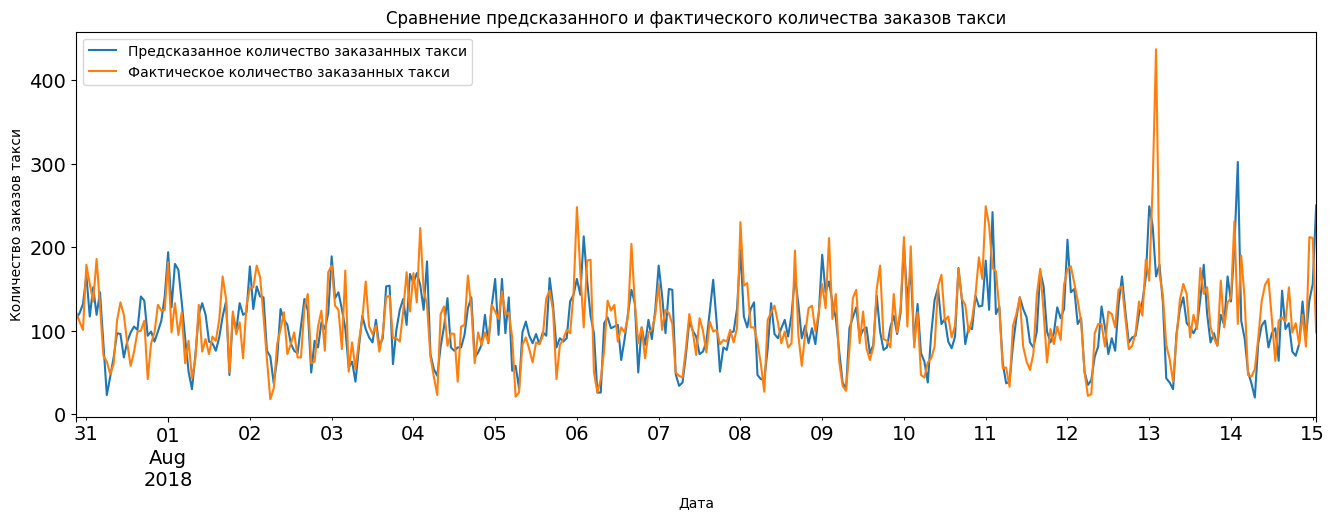

In [72]:
plot_prediction_real(lr_data[-len(valid_indices):]['predicted_num_orders'], 
                     lr_data[-len(valid_indices):]['num_orders'])

In [73]:
liner_rmse = rmse(lr_data[-len(valid_indices):]['num_orders'],
                  lr_data[-len(valid_indices):]['predicted_num_orders'])
print(f'RMSE линейной регресии: {liner_rmse}')

RMSE линейной регресии: 35.70161732263757


### CatBoostRegressor.

Для модели CatBoostRegressor числовые признаки не требуют масштабирования, а категориальные - кодирования.

In [74]:
cat_train_pool = Pool(
    data=x_train,
    label=y_train,
    cat_features=x_cat
)

In [75]:
cat_valid_pool = Pool(
    data=x_valid,
    label=y_valid,
    cat_features=x_cat
)

Выполним подбор гиперпараметров модели методами библиотеки Optuna.

In [76]:
def objective(trial):

    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 0.001, 10),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 100)
    }
    
    model = CatBoostRegressor(**params, task_type="GPU", iterations=2000,
                              early_stopping_rounds=250, verbose=False, random_seed=SEED)
    model.fit(cat_train_pool, eval_set=cat_valid_pool)
    preds = model.predict(cat_valid_pool)
    cat_rmse = rmse(y_valid, preds)
    return cat_rmse

In [77]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

Best is trial 4 with value: 34.971456302445354 and parameters: {'learning_rate': 0.2770144811604932, 'depth': 5, 'l2_leaf_reg': 5.093756442072694, 'min_data_in_leaf': 94}

In [78]:
params_cat = {
    'learning_rate': 0.2770144811604932,
    'depth': 5, 
    'l2_leaf_reg': 5.093756442072694,
    'min_data_in_leaf': 94,
    'iterations': 2000, 
    'task_type': "GPU", 
    'random_seed': SEED, 
    'verbose': False
}

In [79]:
catboost = CatBoostRegressor(**params_cat)

In [80]:
catboost.fit(cat_train_pool, eval_set=cat_valid_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [81]:
catboost.tree_count_

848

In [82]:
preds_cat_train = np.ceil(catboost.predict(x_train))
preds_cat_valid = np.ceil(catboost.predict(x_valid))

In [83]:
cat_rmse_stat = rmse(y_valid, preds_cat_valid)
print(f'RMSE стационарного ряда: {cat_rmse_stat}')

RMSE стационарного ряда: 34.9890393796733


Проведем обратное преобразование временного ряда и построим графики количества предсказанных и фактических заказов такси за валидационный период.

In [84]:
cat_data = time_back(preds_cat_train, preds_cat_valid, train_indices, valid_indices)
cat_data.tail()

,num_orders,predicted_num_orders
datetime,,
2018-08-14 21:00:00,119,147.00
2018-08-14 22:00:00,81,94.00
2018-08-14 23:00:00,212,151.00
2018-08-15 00:00:00,211,136.00
2018-08-15 01:00:00,98,217.00


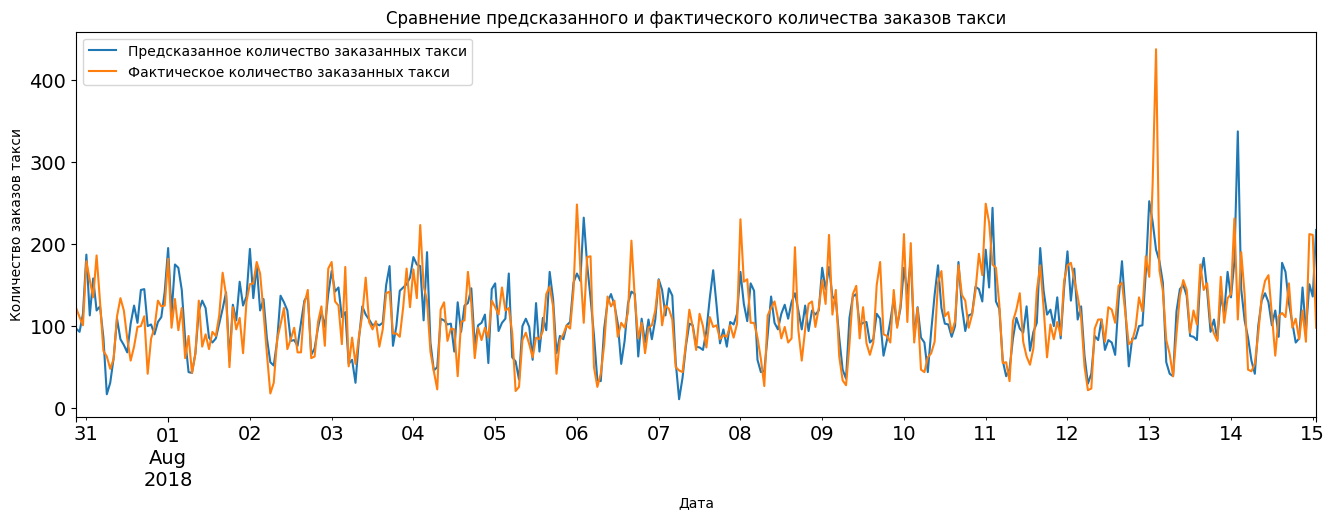

In [85]:
plot_prediction_real(cat_data[-len(valid_indices):]['predicted_num_orders'], 
                     cat_data[-len(valid_indices):]['num_orders'])

In [86]:
cat_rmse = rmse(cat_data[-len(valid_indices):]['num_orders'],
                  cat_data[-len(valid_indices):]['predicted_num_orders'])
print(f'RMSE CatBoost: {cat_rmse}')

RMSE CatBoost: 34.9890393796733


### LightGBM.

Для работы модели LightGBM числовые признаки не требуют масштабирования, а категориальные должны быть преобразованы в тип "category".

In [87]:
lg_train_data = lgb.Dataset(x_train, label=y_train, 
                         categorical_feature=x_cat, free_raw_data=False)
lg_valid_data = lgb.Dataset(x_valid, label=y_valid, 
                         categorical_feature=x_cat, free_raw_data=False)

Выполним подбор гиперпараметров модели методами библиотеки Optuna.

In [88]:
def obj(trial):

    params = {
        "metric": "rmse",        
        "verbosity": -1,
        "objective": "regression",
        "num_boost_round": 2000,
        'early_stopping_rounds': 250,
        'nthread': -1,
        'random_state': SEED,
        'max_depth': trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.5),
        "num_leaves": trial.suggest_int("num_leaves", 10, 300),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0)
    }

    model = lgb.train(params, train_set=lg_train_data, valid_sets=lg_valid_data)
    preds = model.predict(x_valid)
    lgb_rmse = rmse(y_valid, preds)
    return lgb_rmse

In [89]:
# study_lgb = optuna.create_study(direction='minimize')
# study_lgb.optimize(obj, n_trials=50)

Best is trial 17 with value: 34.729114294425706 and parameters: {'max_depth': 5, 'learning_rate': 0.10527036201434672, 'num_leaves': 14, 'subsample': 0.502978575352901, 'colsample_bytree': 0.5873569216872739}. 

In [90]:
params_lgb = {
    'max_depth': 5,
    'learning_rate': 0.10527036201434672,
    'num_leaves': 14,
    'subsample': 0.502978575352901,
    'colsample_bytree': 0.5873569216872739,
    'metric': 'rmse',
    'verbosity': -1,
    'objective': 'regression',
    'num_boost_round': 2000,
    'early_stopping_rounds': 250,
    'nthread': -1,
    'random_state': SEED}

In [91]:
lgbm = lgb.train(params_lgb, train_set=lg_train_data, valid_sets=lg_valid_data)

In [92]:
preds_lgb_train = np.ceil(lgbm.predict(x_train))
preds_lgb_valid = np.ceil(lgbm.predict(x_valid))

In [93]:
lgb_rmse_stat = rmse(y_valid, preds_lgb_valid)
print(f'RMSE стационарного ряда: {lgb_rmse_stat}')

RMSE стационарного ряда: 34.74517804329508


Проведем обратное преобразование временного ряда и построим графики количества предсказанных и фактических заказов такси за валидационный период.

In [94]:
lgb_data = time_back(preds_lgb_train, preds_lgb_valid, train_indices, valid_indices)
lgb_data.tail()

,num_orders,predicted_num_orders
datetime,,
2018-08-14 21:00:00,119,158.00
2018-08-14 22:00:00,81,88.00
2018-08-14 23:00:00,212,153.00
2018-08-15 00:00:00,211,177.00
2018-08-15 01:00:00,98,225.00


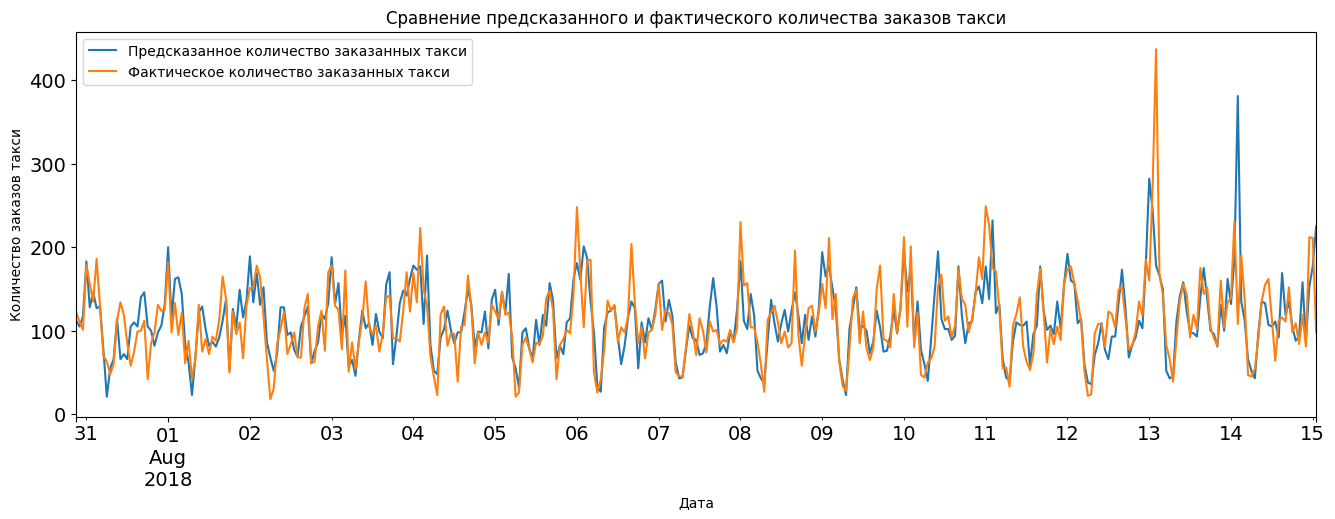

In [95]:
plot_prediction_real(lgb_data[-len(valid_indices):]['predicted_num_orders'], 
                     lgb_data[-len(valid_indices):]['num_orders'])

In [96]:
lgb_rmse = rmse(lgb_data[-len(valid_indices):]['num_orders'],
                  lgb_data[-len(valid_indices):]['predicted_num_orders'])
print(f'RMSE LightGBM: {lgb_rmse}')

RMSE LightGBM: 34.74517804329508


### NeuralProphet

Модель NeuralProphet имеет те же требования к данным, что и модель Prophet.

In [97]:
neu_pro = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    ar_layers=[16,16,4]
)

neu_pro.add_country_holidays(country_name='RU')
neu_pro.set_plotting_backend("matplotlib")  

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


In [98]:
metrics = neu_pro.fit(train_prophet, validation_df=valid_prophet, progress="bar")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as h
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 80
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (52) is too small than the required number                     for the learning rate finder (238). The results might not be optimal.


Finding best initial lr:   0%|          | 0/238 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [99]:
future_df = neu_pro.make_future_dataframe(train_prophet, periods=periods)
neu_pro_forecast = neu_pro.predict(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.97% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h
INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.726% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h


Predicting: 52it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [100]:
neu_pro_forecast.tail()

,ds,y,yhat1,trend,season_weekly,season_daily,events_additive,event_День Победы,event_День России,event_День защитника Отечества,event_День народного единства,event_Международный женский день,event_Новогодние каникулы,event_Праздник Весны и Труда,event_Рождество Христово
360,2018-08-14 21:00:00,None,118.29,118.96,-6.76,6.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
361,2018-08-14 22:00:00,None,126.74,118.99,-5.91,13.66,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
362,2018-08-14 23:00:00,None,145.14,119.01,-5.05,31.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
363,2018-08-15 00:00:00,None,154.26,119.04,-4.24,39.46,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
364,2018-08-15 01:00:00,None,145.19,119.07,-3.37,29.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [101]:
neu_pro_pred = pd.DataFrame({"date":neu_pro_forecast['ds'], 
                             "pred": np.ceil(neu_pro_forecast["yhat1"])})

neu_pro_pred = neu_pro_pred.set_index("date")
neu_pro_pred.tail()

,pred
date,
2018-08-14 21:00:00,119.00
2018-08-14 22:00:00,127.00
2018-08-14 23:00:00,146.00
2018-08-15 00:00:00,155.00
2018-08-15 01:00:00,146.00


Построим графики количества предсказанных и фактических заказов такси за валидационный период.

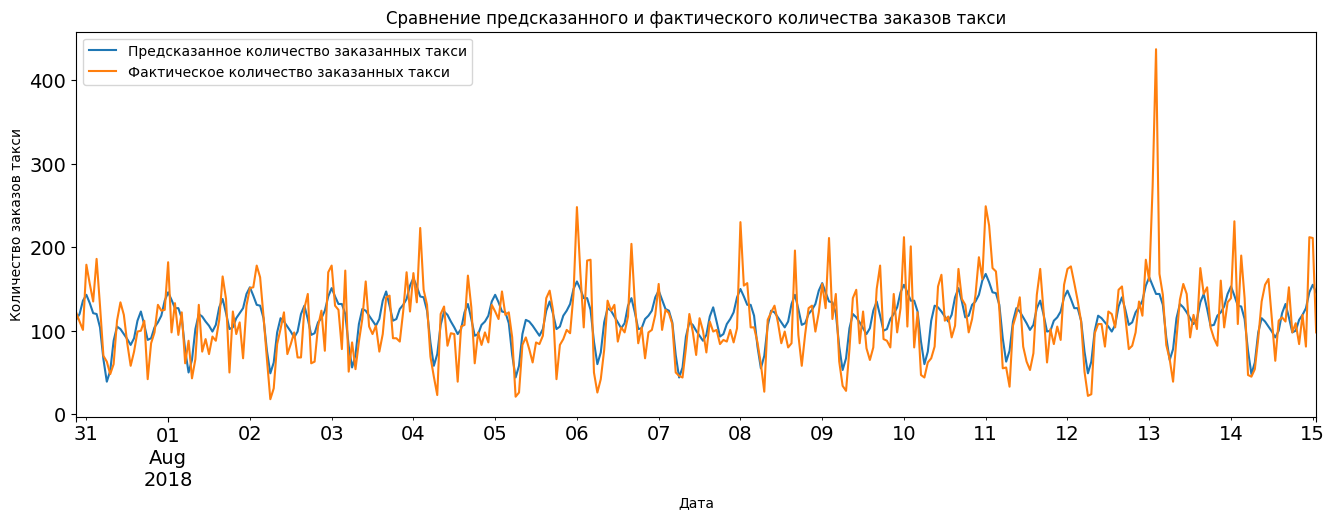

In [102]:
plot_prediction_real(neu_pro_pred['pred'], valid_target['y'])

In [103]:
neu_pro_rmse = rmse(valid_prophet['y'], neu_pro_pred['pred'])
print(f'RMSE NeuralProphet: {neu_pro_rmse}')

RMSE NeuralProphet: 33.22575333881095


**Выводы:**

* Были обучены 5 моделей, решающий задачу предсказания временных рядов: Prophet, LinearRegression, CatBoostRegression, LightGBM и NeuralProphet.

* Для подбора гиперпараметров моделей градиентного бустинга была использована библиотека Optuna.

* Все модели достигли установленного в задании качества.

## Сравнение качества работы моделей на валидационной выборке.

Сведем данные о качестве работы моделей в таблицу.

In [104]:
final = pd.DataFrame({
    'model' : ['Prophet', 'LinearRegression', 'CatBoostRegression', 'LightGBM', 'NeuralProphet'],
    'RMSE_valid': [prophet_rmse, liner_rmse, cat_rmse, lgb_rmse, neu_pro_rmse],
})

final.sort_values(by='RMSE_valid')

,model,RMSE_valid
4,NeuralProphet,33.23
0,Prophet,34.04
3,LightGBM,34.75
2,CatBoostRegression,34.99
1,LinearRegression,35.70


**Вывод**:
* Наилучшие результаты на валидационной выборке показала модель NeuralProphet.

## Тестирование лучшей модели.

Проведем проверку работы лучшей модели на тестовой выборке. Поскольку данные во временных рядах не являются независимыми наблюдениями, перед тестированием проведем дообучение модели на объединенном наборе из обучающей и валидационной выборок.

In [105]:
trval_inices = x_tr.index.tolist()
test_indices = x_test.index.tolist()

In [106]:
trval_prophet = data_prophet.loc[trval_inices]
test_prophet = data_prophet.loc[test_indices]

In [107]:
neu_pro_2 = NeuralProphet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=True,
    ar_layers=[16,16,4]
)

neu_pro_2.add_country_holidays(country_name='RU')
neu_pro_2.set_plotting_backend("matplotlib")  

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


In [108]:
metrics_2 = neu_pro_2.fit(trval_prophet, progress="bar")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.973% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as h
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 80
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (58) is too small than the required number                     for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [109]:
periods = test_prophet.shape[0]
future_test = neu_pro.make_future_dataframe(trval_prophet, periods=periods)
test_forecast = neu_pro.predict(future_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.973% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.754% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h
INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.754% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - h


Predicting: 52it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [110]:
test_forecast.tail()

,ds,y,yhat1,trend,season_weekly,season_daily,events_additive,event_День Победы,event_День России,event_День защитника Отечества,event_День народного единства,event_Международный женский день,event_Новогодние каникулы,event_Праздник Весны и Труда,event_Рождество Христово
401,2018-08-31 19:00:00,None,131.78,129.95,12.47,-10.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
402,2018-08-31 20:00:00,None,143.71,129.98,12.48,1.26,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
403,2018-08-31 21:00:00,None,148.44,130.00,12.37,6.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
404,2018-08-31 22:00:00,None,155.80,130.03,12.15,13.62,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
405,2018-08-31 23:00:00,None,172.70,130.06,11.82,30.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [111]:
test = test_forecast[['ds', 'yhat1']]
test_prophet = test_prophet.reset_index()
test['y'] = test_prophet['y']
test = test.set_index('ds')
test.tail()

,yhat1,y
ds,,
2018-08-31 19:00:00,131.78,136
2018-08-31 20:00:00,143.71,154
2018-08-31 21:00:00,148.44,159
2018-08-31 22:00:00,155.80,223
2018-08-31 23:00:00,172.70,205


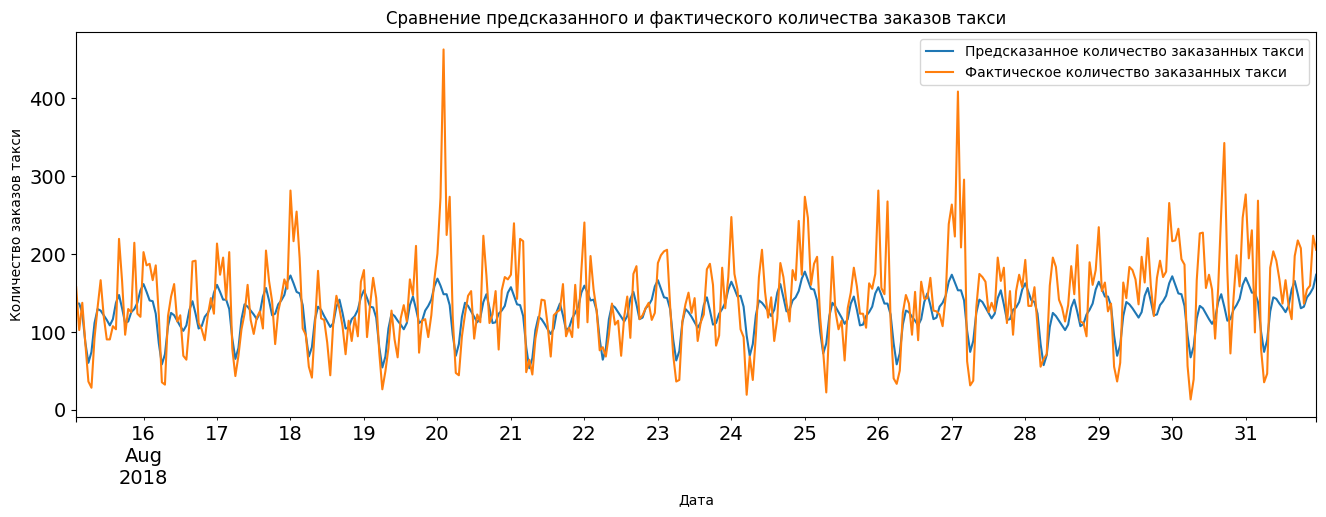

In [112]:
plot_prediction_real(np.ceil(test['yhat1']), test['y'])

In [113]:
neu_pro_test_rmse = rmse(test['y'], np.ceil(test['yhat1']))
print(f'RMSE NeuralProphet на тесте: {neu_pro_test_rmse}')

RMSE NeuralProphet на тесте: 47.126336857597614


Значение метрики качества на тестовой выборке не превышает установленного в задании лимита. Сильная разница в значении RMSE на валидационной и тестовой выборке объясняется наличием большего количества шума в тестовой части временного ряда по сравнению с предыдущим периодом.

**Выводы**:
* Модель NeuralProphet на тестовой выборке показала удовлетворительные результаты. 
* Средняя ошибка прогноза модели на тестовой выборке составила 47 заказов.

##  Общий вывод.

В рамках данного проекта было произведено исследование исторических данных о количестве заказов такси в аэропортах с целью разработки модели, способной прогнозировать количество заказов на следующий час.

Данные, предоставленные для анализа, представляют собой временной ряд с интервалом в 10 минут. Исходная таблица содержит 26496 наблюдений и 2 признака (время и количество заказов). Данные были ресемплированны по одному часу.

Визуальный анализ временного ряда показал, что он не является стационарным. Наблюдается ускоряющийся восходящий тренд с посуточной и понедельной сезонными компонентами. Пиковые значения переменной приходятся на полночь, в то время как минимальные значения - на раннее утро, приблизительно 6 часов. В разрезе недели значительные пики проявляются с ночь с пятницы на субботу и с воскресенья на понедельник, а также перед и после праздников. Так же было обнаружено наличие во временном ряде сильного шума во второй половине августа.

Путем двойного сезонного дифференцирования временной ряд был приведен к стационарности. В таблицу были добавлены синтетические признаки. После классификации признаков, датафрейм был разделен на обучающую, валидационную и тестовую выборки.

Согласно заданию, метрикой качества является RMSE. Ее значение на тестовой выборке не должно превышать 48.

Были обучены 5 моделей, решающий задачу регрессии: Prophet, LinearRegression, CatBoostRegression, LightGBM и NeuralProphet. На валидационной выборке все модели достигли установленного в задании качества. Наилучшие результаты на валидации продемонстрировала модель NeuralProphet (RMSE=33,23). Значение ее метрики качества на тестовой выборке составило 47,12. Такакя разница обусловленна увеличением неопределенности связанной с сильными отличиями тестовой выборки от предыдущиго периода.

В целом, модель может считаться хорошим начальным решением. Для ее дальнейшего улучшения следует накопить больше исторических данных для анализа.